# Import Library

In [124]:
import pandas as pd
import numpy as np

# Import Data

In [125]:
data = pd.read_csv('titanic.csv')

## Check Data 

In [126]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
# describe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Value Treatment

## Identify Missing Values

In [129]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Treat Missing Values

### Numerical Imputation : Age

In [130]:
data['Age'] = data['Age'].fillna(value = data['Age'].mean())

# Alternate Method
#data['Age'].fillna(method = 'bfill')

### Categorical/Object Imputation : Cabin and Embarked

In [131]:
# Identified Missing Values
data['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [132]:
# Imputed with CONSTANT value "Missing"
data['Embarked'].fillna(value = 'Missing').value_counts(dropna = False)

S          644
C          168
Q           77
Missing      2
Name: Embarked, dtype: int64

In [133]:
# Imputed Embarked
data['Embarked'] = data['Embarked'].fillna(value = 'Missing')

In [134]:
# Imputed Cabin
data['Cabin'] = data['Cabin'].fillna(value = 'Missing')

### Check for Missing Values

In [135]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Transformation

### Numerical Transformation

<AxesSubplot:ylabel='Frequency'>

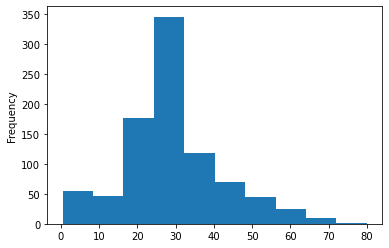

In [136]:
data['Age'].plot.hist()

In [137]:
# Normalization using log transformation
data['Age'] = np.log(data['Age'])

<AxesSubplot:ylabel='Frequency'>

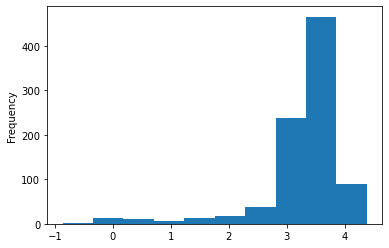

In [138]:
data['Age'].plot.hist()

In [139]:
# Fare
data['Fare'] = np.log(data['Fare']+1)

<AxesSubplot:ylabel='Frequency'>

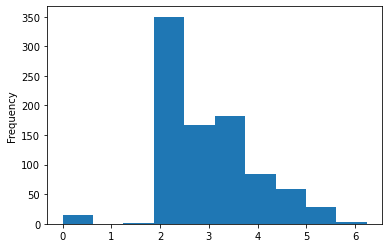

In [140]:
data['Fare'].plot.hist()

### Categorical Encoding

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Drop Columns

In [142]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [143]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,3.091042,1,0,2.110213,S
1,1,1,female,3.637586,1,0,4.280593,C
2,1,3,female,3.258097,0,0,2.188856,S
3,1,1,female,3.555348,1,0,3.990834,S
4,0,3,male,3.555348,0,0,2.202765,S


In [145]:
data = pd.get_dummies(data)

In [146]:
data.to_csv('titanic_transformed.csv', index = False)

## Feature

In [147]:
data['Family'] = data['SibSp'] + data['Parch']

In [148]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S,Family
0,0,3,3.091042,1,0,2.110213,0,1,0,0,0,1,1
1,1,1,3.637586,1,0,4.280593,1,0,1,0,0,0,1
2,1,3,3.258097,0,0,2.188856,1,0,0,0,0,1,0
3,1,1,3.555348,1,0,3.990834,1,0,0,0,0,1,1
4,0,3,3.555348,0,0,2.202765,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,3.295837,0,0,2.639057,0,1,0,0,0,1,0
887,1,1,2.944439,0,0,3.433987,1,0,0,0,0,1,0
888,0,3,3.391117,1,2,3.196630,1,0,0,0,0,1,3
889,1,1,3.258097,0,0,3.433987,0,1,1,0,0,0,0
